In [1]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#useful imports
import random
import re

# Import Scikit-learn helper functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Import Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Import Scikit-learn metric functions
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
df=pd.read_csv('url.csv')
df.head()

,URL,Target,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,https://locking-app-adverds.000webhostapp.com/...,yes,NaN,NaN,NaN,NaN
1,http://www.myhealthcarepharmacy.ca/wp-includes...,yes,NaN,NaN,NaN,NaN
2,http://code.google.com/p/pylevenshtein/,no,NaN,NaN,NaN,NaN
3,http://linkedin.com/,no,NaN,NaN,NaN,NaN
4,http://imageshack.com/f/219/cadir2yr3.jpg,no,NaN,NaN,NaN,NaN


In [3]:
df=df[['URL','Target']]
df=pd.DataFrame(df)
df.head()

,URL,Target
0,https://locking-app-adverds.000webhostapp.com/...,yes
1,http://www.myhealthcarepharmacy.ca/wp-includes...,yes
2,http://code.google.com/p/pylevenshtein/,no
3,http://linkedin.com/,no
4,http://imageshack.com/f/219/cadir2yr3.jpg,no


In [4]:
df.isnull().sum()
df=df.dropna()
df.isnull().sum()

URL       0
Target    0
dtype: int64

In [5]:
#---------------  DATA CLEANING -----------

In [6]:
#Removing duplicated Data
dups=df.duplicated()
print(dups.any())
df[dups]

True


,URL,Target
254,http://info5272ni770.000webhostapp.com/payment...,yes
328,http://kuriobaba.com/update/confirm.html,yes
539,http://www.servinauticbalear.com/don/fidelity-...,yes
554,http://www.jocuri-kizi.ro/clase/paypal.sirvec....,yes
580,http://paypal.com.uk.signin.priauth.nav.f9a348...,yes
931,http://verify.user.acc-payment-locked.com/bill...,yes
936,https://cvlc-victoria.org/wells/wellsfargo/con...,yes
948,https://ppid.posokab.go.id/wp-includes/css/fid...,yes
951,http://www.umakantagiri.com/wp-admin/maiint/a7...,yes
1004,http://craftingforwellness.org/web/mpp/update/...,yes


In [7]:
#Dropping the duplicated data
df=df.drop_duplicates()
dups=df.duplicated()
dups.any()
df.reset_index()

,index,URL,Target
0,0,https://locking-app-adverds.000webhostapp.com/...,yes
1,1,http://www.myhealthcarepharmacy.ca/wp-includes...,yes
2,2,http://code.google.com/p/pylevenshtein/,no
3,3,http://linkedin.com/,no
4,4,http://imageshack.com/f/219/cadir2yr3.jpg,no
...,...,...,...
1732,1776,https://docs.google.com/document/u/1/,no
1733,1777,http://www.charlestodd.com/wp-includes/pomo/ad...,yes
1734,1778,http://tslimpact.com/medsynaptic/wp-content/th...,yes
1735,1779,http://daoudilorin11.mystagingwebsite.com/wp-c...,yes


In [8]:
#---------------  SPLITTING DATA --------------

In [9]:
#Splitting dataset for training and testing
train,test=train_test_split(df,train_size=0.8,random_state=40)
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)
trainx=train['URL']
trainy=train['Target']
testx=test['URL']
testy=test['Target']
train.head()

,URL,Target
0,https://frontendmasters.com/courses/,no
1,http://aevdokimov.ru/server/auto/index.php?&em...,no
2,http://cofounderlabs.com/,no
3,https://weddestinations.com/templates/protosta...,yes
4,https://info222fb0119944c.000webhostapp.com/pa...,yes


In [10]:
#---------------  DATA VSIUALIZATION -----------

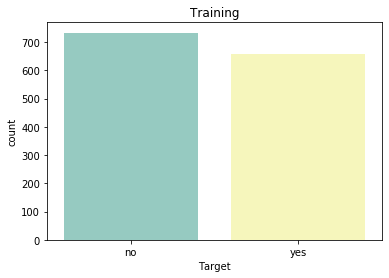

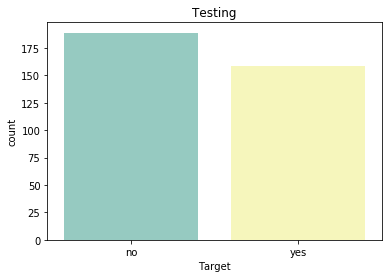

In [11]:
sns.countplot(x='Target',data=train, palette = 'Set3')
plt.title("Training")
plt.show()

sns.countplot(x='Target',data=test, palette = 'Set3')
plt.title("Testing")
plt.show()

In [12]:
#----------TRAINING DATASET   --------

In [13]:
#Vectorizing (to find frequencies of words)
# --Removing un wanted words in data
def rtokenize(url):  
    tokens = re.split('[/-]', url)
    if(tokens[0]=="https:" or tokens[0]=="http:"):
        tokens.pop(0)
    if(tokens[0]==""):
        tokens.pop(0)
    
    for i in tokens:
        if i.find(".") >= 0:
            tokens.remove(i)
            dot_split = i.split('.')
            if "com" in dot_split:
                dot_split.remove("com")
            if "www" in dot_split:
                dot_split.remove("www")
            tokens += dot_split  
    return ' '.join(tokens)

In [14]:
# Manually perform term count for an example
df=df.reset_index()
url=df['URL'][10]
url=rtokenize(url)
tokens=url.split(" ")
print("URL: ",url)
print("\nURL Tokens: ",tokens)
print('\nFrequency Counts: ')
for i in list(dict.fromkeys(tokens)):
    print("{}-{}".format(i,tokens.count(i)),end=' | ')

URL:  uploads gallery mankind secure fiscal manual mail login  gulfshield

URL Tokens:  ['uploads', 'gallery', 'mankind', 'secure', 'fiscal', 'manual', 'mail', 'login', '', 'gulfshield']

Frequency Counts: 
uploads-1 | gallery-1 | mankind-1 | secure-1 | fiscal-1 | manual-1 | mail-1 | login-1 | -1 | gulfshield-1 | 

In [15]:
#Perform Count Vectorizer using Count and Tfidf vectorizer
evec=CountVectorizer()
ex=evec.fit_transform([url])
efeatures=evec.get_feature_names()
ecounts=ex.toarray()
print("Count Vectorizer: ")
for i in range(len(ecounts[0])):
    print(efeatures[i],'-',ecounts[0][i],end=' |')
print("\n")

ecounts=[]
evec=TfidfVectorizer()
ex=evec.fit_transform([url])
efeatures=evec.get_feature_names()
ecounts=ex.toarray()
print("Tfidf Vectorizer: ")
for i in range(len(ecounts[0])):
    print(efeatures[i],'-',ecounts[0][i],end=' | ')

Count Vectorizer: 
fiscal - 1 |gallery - 1 |gulfshield - 1 |login - 1 |mail - 1 |mankind - 1 |manual - 1 |secure - 1 |uploads - 1 |

Tfidf Vectorizer: 
fiscal - 0.3333333333333333 | gallery - 0.3333333333333333 | gulfshield - 0.3333333333333333 | login - 0.3333333333333333 | mail - 0.3333333333333333 | mankind - 0.3333333333333333 | manual - 0.3333333333333333 | secure - 0.3333333333333333 | uploads - 0.3333333333333333 | 

In [16]:
#--------Implementing different Vectorizers----------

In [17]:
#--Fitting the training data
#1. Count vectorizer

cv=CountVectorizer()
cvx=cv.fit_transform(train['URL'])
test_cvx=cv.transform(test['URL'])

#2. Term Frequency-Inverse Document Frequency (TF-IDF)
tv=TfidfVectorizer()
tvx=tv.fit_transform(train['URL'])
test_tvx=tv.transform(test['URL'])


In [18]:
cv.vocabulary_

{'https': 2385,
 'frontendmasters': 2144,
 'com': 1572,
 'courses': 1633,
 'http': 2384,
 'aevdokimov': 1003,
 'ru': 3503,
 'server': 3621,
 'auto': 1171,
 'index': 2467,
 'php': 3220,
 'email': 1938,
 'test': 3908,
 'sg': 3641,
 'pwc': 3345,
 'cofounderlabs': 1565,
 'weddestinations': 4175,
 'templates': 3903,
 'protostar': 3324,
 'img': 2451,
 'chasebank': 1482,
 'validation': 4082,
 'step1': 3806,
 'cmd': 1551,
 'login_submit': 2758,
 'id': 2410,
 '4fd9035bcf482036d7e6e52156f5da4f4fd9035bcf482036d7e6e52156f5da4f': 683,
 'session': 3631,
 'info222fb0119944c': 2480,
 '000webhostapp': 4,
 'payment': 3182,
 'update': 4036,
 '01': 8,
 'html': 2383,
 'fb_source': 2050,
 'bookmark_apps': 1321,
 'ref': 3422,
 'bookmarks': 1322,
 'count': 1629,
 'fb_bmpos': 2049,
 'login_failed': 2757,
 'hpe': 2373,
 'www': 4234,
 'servinauticbalear': 3628,
 'don': 1842,
 'fidelity': 2071,
 'loooo': 2772,
 'update000000': 4037,
 'secure': 3597,
 'final': 2083,
 'mudraksh': 2927,
 'box': 1330,
 'yah': 4256,
 

In [19]:
# -------------------Model Evaluation--------------------

In [20]:
# Multinomial Naive Bayesian with Count Vectorizer
mb_cv = MultinomialNB()
mb_cv.fit(cvx, trainy)
pred_mb_cv=mb_cv.predict(test_cvx)
mb_cv_score = mb_cv.score(test_cvx,testy)
mb_cv_cm = confusion_matrix(testy,pred_mb_cv)
mb_cv_report = classification_report(testy,pred_mb_cv)

# Multinomial Naive Bayesian with TF-IDF
mb_tv = MultinomialNB()
mb_tv.fit(tvx, trainy)
pred_mb_tv = mb_tv.predict(test_tvx)
mb_tv_score = mb_tv.score(test_cvx,testy)
mb_tv_cm = confusion_matrix(testy,pred_mb_tv)
mb_tv_report = classification_report(testy,pred_mb_tv)

In [21]:
#Logistic Regression with Count
lg_cv=LogisticRegression(solver='liblinear')
lg_cv.fit(cvx,trainy)
pred_lg_cv=lg_cv.predict(test_cvx)
lg_cv_score = lg_cv.score(test_cvx,testy)
lg_cv_cm = confusion_matrix(testy,pred_lg_cv)
lg_cv_report = classification_report(testy,pred_lg_cv)

#Logistic Regression with TF-IDF
lg_tv=LogisticRegression(solver='liblinear')
lg_tv.fit(tvx,trainy)
pred_lg_tv=lg_tv.predict(test_tvx)
lg_tv_score = lg_tv.score(test_tvx,testy)
lg_tv_cm = confusion_matrix(testy,pred_lg_tv)
lg_tv_report = classification_report(testy,pred_lg_tv)


In [22]:
#Scores
print("MB Count score: ",mb_cv_score)
print("MB tfidf score: ",mb_tv_score)
print("LG Count score: ",lg_cv_score)
print("LG tfidf score: ",lg_tv_score)

#count vectorizer got good score in Multmonial Naive Bayes

MB Count score:  0.9224137931034483
MB tfidf score:  0.9137931034482759
LG Count score:  0.8994252873563219
LG tfidf score:  0.8994252873563219


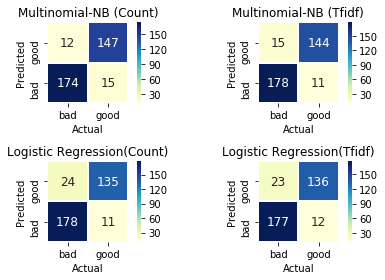

<Figure size 1080x1080 with 0 Axes>

In [23]:
# Confusion Matrix 
def plot_confusion_matrix(cm1,cm2,cm3,cm4):
    fig,ax = plt.subplots(2, 2)
    plt.figure(figsize=(15,15))
    g1=sns.heatmap(cm1, annot=True,fmt="d", linewidths=.99, square=True,cmap = 'YlGnBu', annot_kws={"size": 12}, 
              xticklabels=['bad', 'good'], yticklabels=['bad', 'good'],ax=ax[0,0])

    g2=sns.heatmap(cm2, annot=True,fmt="d", linewidths=.99, square=True,cmap = 'YlGnBu', annot_kws={"size": 12}, 
              xticklabels=['bad', 'good'], yticklabels=['bad', 'good'],ax=ax[0,1])

    g3=sns.heatmap(cm3, annot=True,fmt="d", linewidths=.99, square=True,cmap = 'YlGnBu', annot_kws={"size": 12}, 
              xticklabels=['bad', 'good'], yticklabels=['bad', 'good'],ax=ax[1,0])

    g4=sns.heatmap(cm4, annot=True,fmt="d", linewidths=.99, square=True,cmap = 'YlGnBu', annot_kws={"size": 12}, 
              xticklabels=['bad', 'good'], yticklabels=['bad', 'good'],ax=ax[1,1])

    g1.set_ylim(0 ,2)
    g2.set_ylim(0 ,2)
    g3.set_ylim(0 ,2)
    g4.set_ylim(0 ,2)
    
    i=0
    for axs in ax.flat:
        if(i==0):
            axs.set_title("Multinomial-NB (Count)")
        if(i==1):
            axs.set_title("Multinomial-NB (Tfidf)")
        if(i==2):
            axs.set_title("Logistic Regression(Count)")
        if(i==3):
            axs.set_title("Logistic Regression(Tfidf)")
            
        i=i+1
        axs.set(xlabel='Actual', ylabel='Predicted')

    fig.tight_layout()
    plt.show()    

plot_confusion_matrix(mb_cv_cm, mb_tv_cm, lg_cv_cm, lg_tv_cm)

In [24]:
#Classification Report
print("Multimobial Naive Bayes (Count Vetorizer): \n",mb_cv_report)
print("------------------------------------------------------------")
print("Multimobial Naive Bayes (Tfidf Vetorizer): \n",mb_tv_report)
print("------------------------------------------------------------")
print("Logistic Regression (Count Vetorizer): \n",lg_cv_report)
print("------------------------------------------------------------")
print("Logistic Regression (Tfidf Vetorizer): \n",lg_tv_report)

# Multimonial Naive Bayes with Count Vectorizer got more accuracy

Multimobial Naive Bayes (Count Vetorizer): 
               precision    recall  f1-score   support

          no       0.94      0.92      0.93       189
         yes       0.91      0.92      0.92       159

    accuracy                           0.92       348
   macro avg       0.92      0.92      0.92       348
weighted avg       0.92      0.92      0.92       348

------------------------------------------------------------
Multimobial Naive Bayes (Tfidf Vetorizer): 
               precision    recall  f1-score   support

          no       0.92      0.94      0.93       189
         yes       0.93      0.91      0.92       159

    accuracy                           0.93       348
   macro avg       0.93      0.92      0.92       348
weighted avg       0.93      0.93      0.93       348

------------------------------------------------------------
Logistic Regression (Count Vetorizer): 
               precision    recall  f1-score   support

          no       0.88      0.94     

In [25]:
#We got more score and accuracy using Multinomial Naive Bayes with count Vectorizer (0.97)

In [26]:
#Check performance of our model by comparing scores with Dummy Classifier
# Training a Dummy Classifier
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(train['URL'], trainy)
score = dummy_clf.score(testx, testy)

print("Testing Acc with Dummy Classifier:", score)
#We found our model got more score with less logloss compared to the dummy classfier

Testing Acc with Dummy Classifier: 0.5431034482758621


In [27]:
#-------------------Final Model for implemnting------------------------

In [28]:
cv=CountVectorizer()
cv.fit(train['URL'])
cv.transform(train['URL'])

#Classifier
mb_cv = MultinomialNB()
mb_cv.fit(cvx, trainy)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
pred=['google.com/']
a=cv.transform(pred)
mb_cv.predict(a)

array(['no'], dtype='<U3')